In [47]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
sapling = ADatabase("sapling")

In [49]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

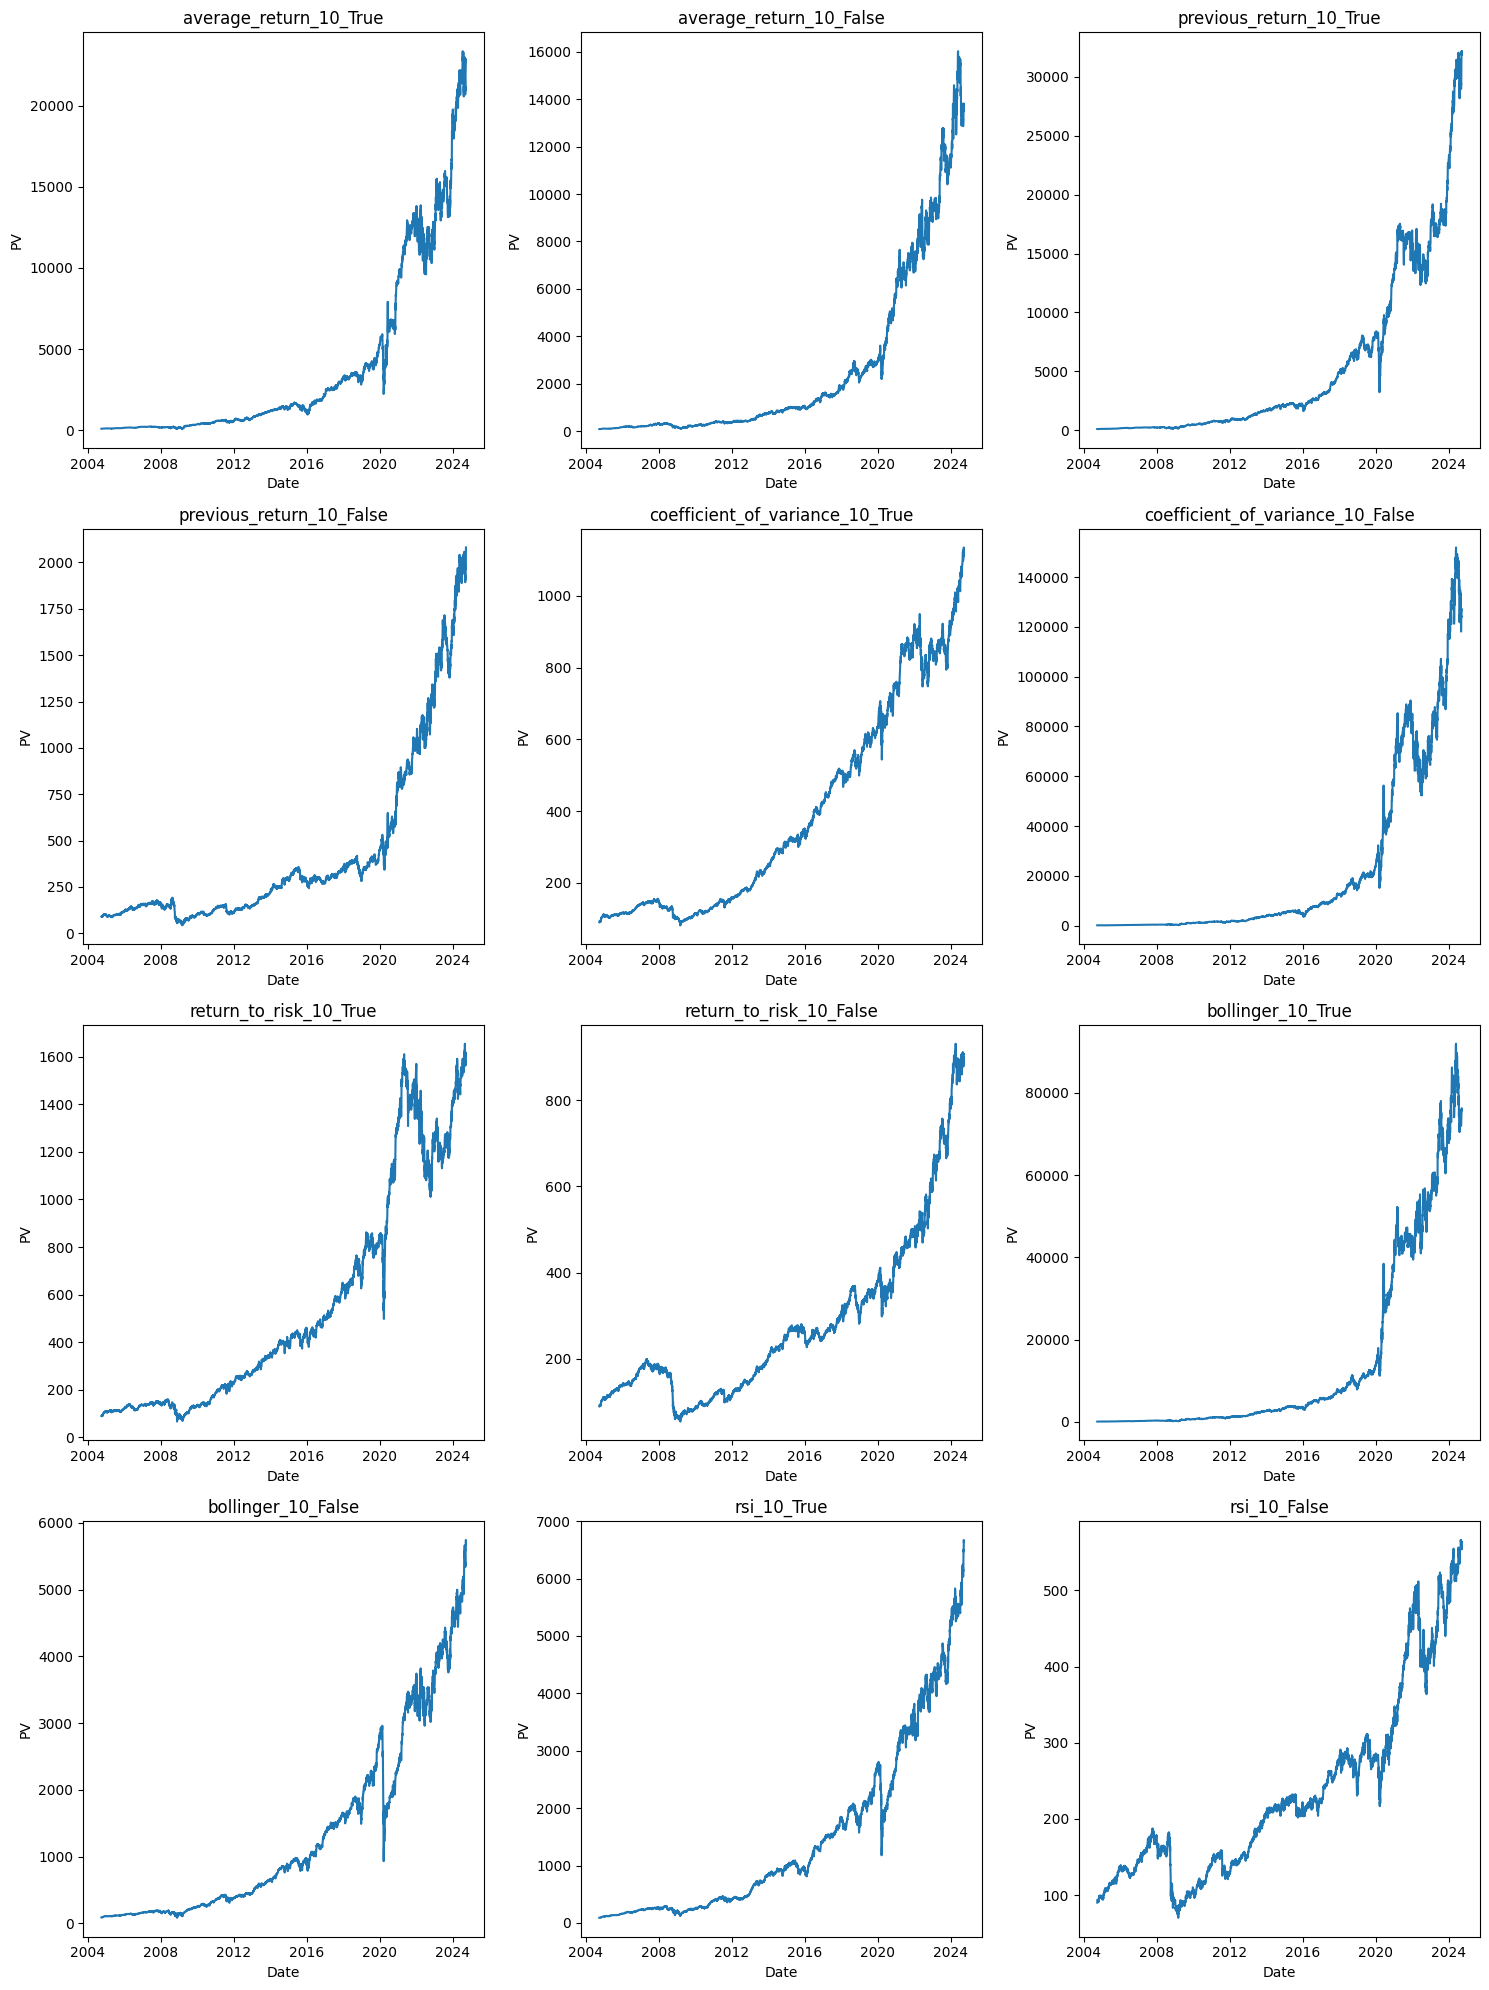

In [50]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [10]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [51]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("pv",ascending=False)

,name,position,boolean,pv,std,risk_to_return
5,coefficient_of_variance,10,False,127096.887460,34980.893673,3.633323
8,bollinger,10,True,76148.468453,22411.587583,3.397728
2,previous_return,10,True,31875.780108,7159.111470,4.452477
0,average_return,10,True,22722.297232,5438.191027,4.178282
1,average_return,10,False,13730.467409,3682.000744,3.729078
10,rsi,10,True,6637.550484,1510.430302,4.394477
9,bollinger,10,False,5673.561634,1370.666802,4.139271
3,previous_return,10,False,2080.897559,470.955103,4.418463
6,return_to_risk,10,True,1606.721095,459.288464,3.498283
4,coefficient_of_variance,10,True,1131.386030,288.868366,3.916614


In [52]:
trade_analysis = trades[(trades["name"]=="coefficient_of_variance") & (trades["positions"]==10) & (trades["boolean"]==False)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

C:\Users\eric\AppData\Local\Temp\ipykernel_16084\3748924737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]


In [53]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
261884,buy,market,day,LVS,30.56,9.282210,8.054830,2008-10-27,3.793997,2008-10-31,4,coefficient_of_variance,10,False,74.766621,1.446552
262122,buy,market,day,HIG,26.32,10.709095,5.424840,2008-12-01,4.851756,2008-12-05,2,coefficient_of_variance,10,False,58.095129,1.207262
263803,buy,market,day,AIG,83.93,17.773943,9.423329,2009-08-03,8.906618,2009-08-07,3,coefficient_of_variance,10,False,167.489721,0.995588
262829,buy,market,day,AIG,29.86,21.218709,2.746678,2009-03-16,10.871314,2009-03-19,9,coefficient_of_variance,10,False,58.280964,0.951807
262934,buy,market,day,MGM,32.00,4.387395,14.131391,2009-03-30,2.264462,2009-04-03,4,coefficient_of_variance,10,False,62.000000,0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262031,buy,market,day,LVS,31.65,2.112864,7.409545,2008-11-17,4.271517,2008-11-21,1,coefficient_of_variance,10,False,15.655360,-0.505360
262634,buy,market,day,C,39.82,14.988141,1.311569,2009-02-09,30.360594,2009-02-20,4,coefficient_of_variance,10,False,19.657975,-0.506329
293081,buy,market,day,PARA,8984.36,43.852491,98.477279,2021-03-22,91.232822,2021-03-26,1,coefficient_of_variance,10,False,4318.474016,-0.519334
262631,buy,market,day,HIG,39.82,4.983876,3.609481,2009-02-09,11.032056,2009-02-20,1,coefficient_of_variance,10,False,17.989208,-0.548237
